# Finding Indicators of Heavy Traffic on I-94

In this project, we'll be analyzing a dataset containing hourly westbound traffic volume on highway I-94. Using this data, we hope to find time and weather related indicators of heavy traffic. 

Throuhghout the analysis, we'll be investigating the following questions: 
- Does traffic volume vary greatly from month to month? 
- What time during the day is traffic volume most heavy? 
- To what extend does inclimate weather affect traffic?

## Summary 
We found that Winter months have much lighter traffic than other seasons. We also found that July has less traffic than other summer months. We suspect that these patterns are related to lessened school traffic from winter/summer breaks. As for time of day, 8:00am rush hour proved to be the hour with the worst traffic, closely followed by 4:00pm. 

Interestingly, we found that weather has a less significant affect on traffic patterns. The strongest weather-related indicator of higher volumes of traffic, however, was "light rain and snow." 


For more information, see the analysis below. 

# About the Data

The dataset analyzed in this notebook can be found from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). It contains hourly westbound traffic volume on [Interstate 94](https://en.wikipedia.org/wiki/Interstate_94), as well as information regarding weather and holidays. The following table summarizes the information contained in each column of the data set. 


| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| holiday | US National holidays plus regional holiday, Minnesota State Fair | Categorical |
| temp | Average temp in kelvin | Numeric |
| rain_1h | Amount in mm of rain that occurred in the hour | Numeric |
| snow_1h | Amount in mm of snow that occurred in the hour | Numeric |
| clouds_all | Percentage of cloud cover | Numeric |
| weather_main | Short textual description of the current weather | Categorical |
| weather_description | Longer textual description of the current weather | Categorical |
| date_time | Hour of the data collected in local CST time | DateTime |
| traffic_volume | Hourly I-94 ATR 301 reported westbound traffic volume | Numeric |

# Initial Data Exploration 

To begin, we'll read in the data and take a look at the first few rows, last few rows, and some general information about the dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Initial Observations

Briefly looking at the output of the above code cells, here are some obversations about the data:

- Each row represents an hour of a day.
- The first row corresponds to the 9th hour of 10-02-2012.
- The final row corresonds to the 23rd hour of 09-30-2018.
- There are a total of 48204 rows, and no column has any missing values.



Most analysis to be done directly pertains to traffic volume. Let's begin by looking at the distribution of this column. 

Text(-900, -60, '   J. Wilson Peoples                                                                                                                  Source: UCI Machine Learning Repository ')

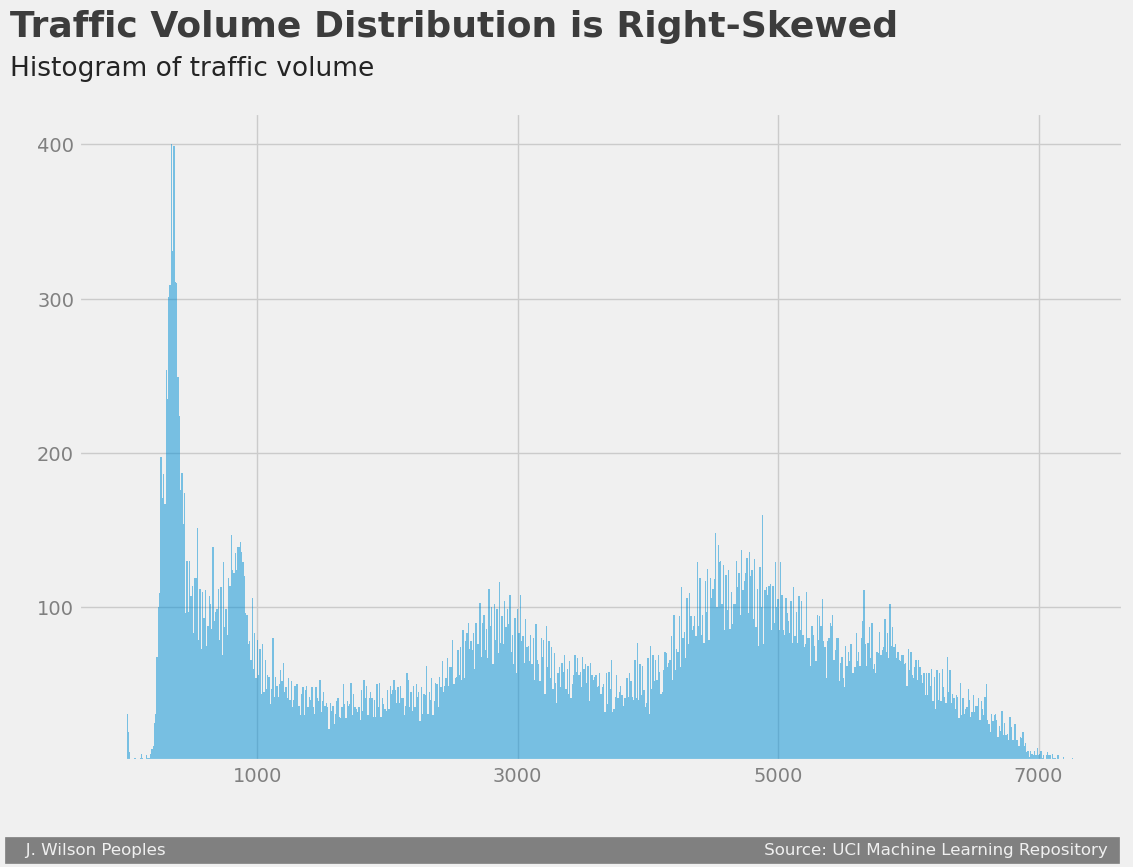

In [4]:
plt.style.use('fivethirtyeight')
#___________________________________________________________
#Initial Plot
fig,ax = plt.subplots(figsize = (12,8))
plot_data = traffic['traffic_volume'].apply(lambda x: np.round(x,-1)).value_counts()
ax.bar(plot_data.index,plot_data.values, width = 10, alpha = .5)
#____________________________________________________________
#Format grid, ticks, etc
ax.set_xticks([1000,3000,5000,7000])
ax.set_yticks([100,200,300,400])
ax.axhline(y = 0, color = 'black', linewidth = 2, alpha = 1)
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-900,470, 'Traffic Volume Distribution is Right-Skewed', weight = 'bold', size = 26, alpha = .75)
ax.text(-900,445, 'Histogram of traffic volume', size = 19, alpha = .85)
ax.text(x = -900, y = -60,
    s = '   J. Wilson Peoples                                                                                                                  Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#_____________________________________________________________
#on figure annotations


An initial look at the data shows a right skewed distribution. I.e., low traffic days are more common. However, we also see a few additional "peaks" occuring at slightly higher traffic volume. For instance, there are many instances of traffic volume between 4500 and 5500.

One may suspect that the distribution is right skewed due to low traffic occuring at primarily night. Moreover, the higher volume bewteen 4500 and 5000, for instance, may be primarily due to daytime traffic. Let's investigate this idea further. 

# Traffic Indicators by Day vs. Night

To begin, we'll convert the date_time column from a string datetime representation to a pandas datetime object. We can then use datetime attributes to easily extract the hour, and create a boolean mask to split our dataframe into day and night.  

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day_mask = (7 < traffic['date_time'].dt.hour) & (traffic['date_time'].dt.hour <= 19)
night_mask = ~day_mask
day = traffic.copy()[day_mask]
night = traffic.copy()[night_mask]

Now we can separate the histograms for daytime and nighttime traffic. Let's look at them on the same plot so we can compare more easily. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


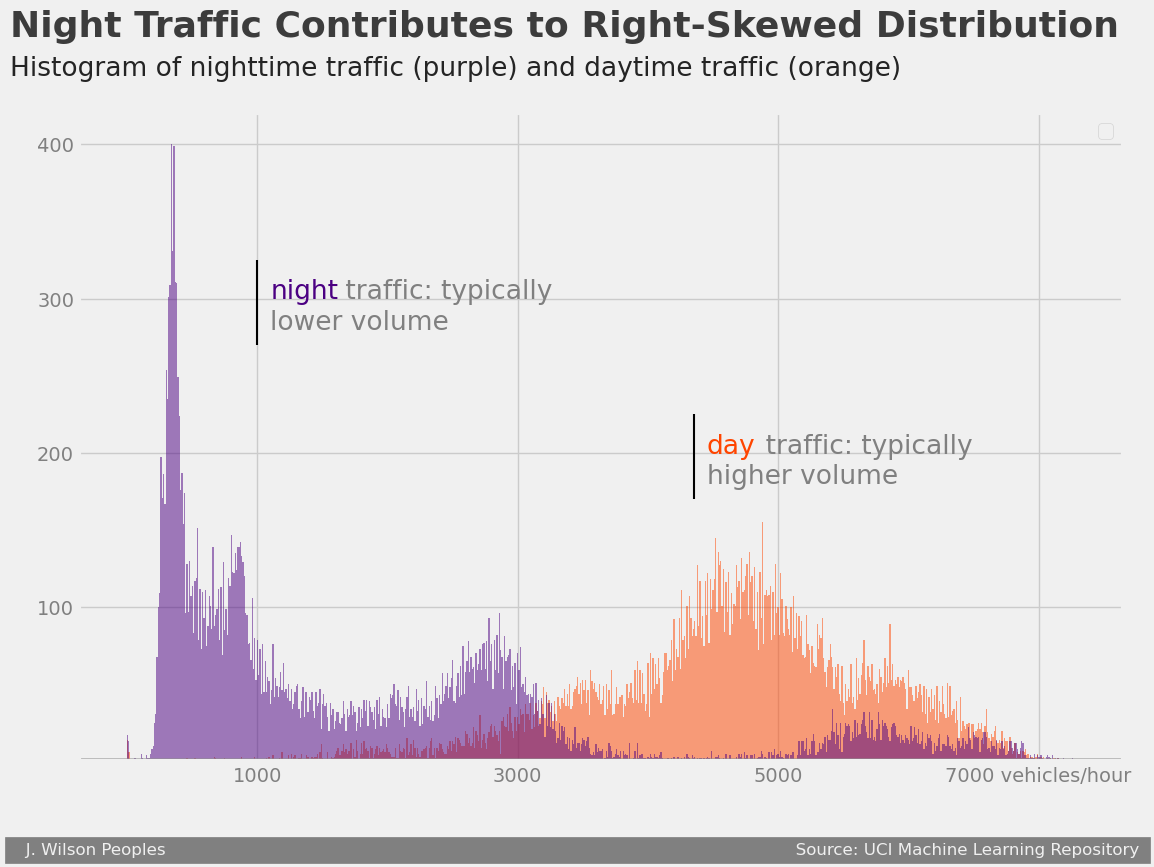

In [26]:
#___________________________________________________________
#Initial Plot
fig,ax = plt.subplots(figsize = (12,8))
day_data = day['traffic_volume'].apply(lambda x: np.round(x,-1)).value_counts()
night_data = night['traffic_volume'].apply(lambda x: np.round(x,-1)).value_counts()
ax.bar(day_data.index,day_data.values, width = 10, alpha = .5, color = 'orangered')
ax.bar(night_data.index, night_data.values, width = 10, alpha = .5, color = 'indigo')
#____________________________________________________________
#Format grid, ticks, etc
ax.legend()
ax.set_xticks([1000,3000,5000,7000])
ax.set_xticklabels(['1000','3000','5000','7000 vehicles/hour'])
ax.set_yticks([100,200,300,400])
ax.axhline(y = 0, color = 'grey', linewidth = 5, alpha = .5)
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-900,470, 'Night Traffic Contributes to Right-Skewed Distribution', weight = 'bold', size = 26, alpha = .75)
ax.text(-900,445, 'Histogram of nighttime traffic (purple) and daytime traffic (orange)', size = 19, alpha = .85)
ax.text(x = -900, y = -60,
    s = '   J. Wilson Peoples                                                                                                                        Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#_____________________________________________________________
#on figure annotations
ax.text(x = 1100, y = 300, s ='         traffic: typically', color = 'grey', size = 19)
ax.text(x = 1100, y = 300, s ='night', size = 19, color = 'indigo')
ax.text(x = 1100, y = 280, s ='lower volume', color = 'grey', size = 19)
ax.vlines(x = 1000, ymin = 270,ymax =325, color = 'black', linewidth = 1.5)

ax.text(x = 4450, y = 200, s ='       traffic: typically', color = 'grey', size = 19)
ax.text(x = 4450, y = 200, s ='day', size = 19, color = 'orangered')
ax.text(x = 4450, y = 180, s ='higher volume', color = 'grey', size = 19)
ax.vlines(x = 4350, ymin = 170,ymax =225, color = 'black', linewidth = 1.5)

We can see that traffic volume at night is typically much lower, and rarely high (>4000). Traffic volume during the day, however, is typically much higher. Our earlier suspicions about how daytime and nighttime traffic combine to form the original histogram have proven correct. 

While 24 hour long periodicity seems natural, one may wonder whether more long term trends, such as seasonal trends, can be detected in traffic patterns. Let's take a closer look at this.  

# Traffic Indicators by Season

To begin, let's look at a simple lineplot of the mean hourly traffic volume, grouped by month. 

/tmp/ipykernel_729/1835113481.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(9.5, 4700, 'Fall')

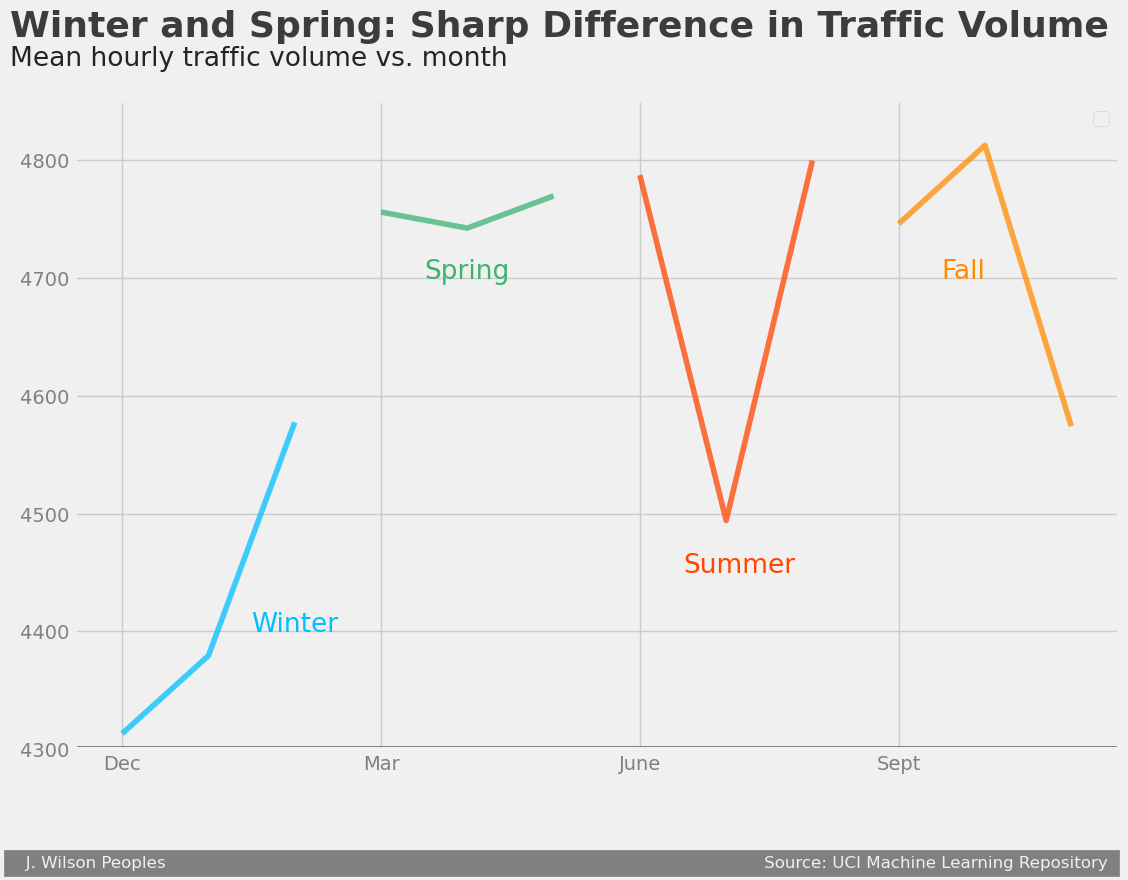

In [7]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
#__________________________________________
#main plot 
fig, ax = plt.subplots(figsize = (12,8))
#create x axis 
x_axis = by_month.index.to_list()
x_axis.insert(0,x_axis.pop()-12) #add duplicate of last item to first position
#create y axis
y_axis = by_month['traffic_volume'].to_list()
y_axis.insert(0,y_axis.pop())
#ax.scatter(x_axis, y_axis, color = 'black', alpha = 1)
#winter months
ax.plot(x_axis[0:3], y_axis[0:3], color = 'deepskyblue', alpha = .75)
#spring months
ax.plot(x_axis[3:6], y_axis[3:6], color = 'mediumseagreen', alpha = .75)
#summer months
ax.plot(x_axis[6:9], y_axis[6:9], color = 'orangered', alpha = .75)
#fall months
ax.plot(x_axis[9:12], y_axis[9:12], color = 'darkorange', alpha = .75)
#____________________________________________________________
#Format grid, ticks, etc
#ax.grid(visible=False, axis = 'y')
ax.set_xticks([0,3,6,9])
ax.set_ylim([4300,4850])
ax.set_xticklabels(['Dec', 'Mar','June','Sept'])
ax.axhline(y = 4300, color = 'black', linewidth = 5, alpha = .5)
ax.legend()
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-1.3,4905, 'Winter and Spring: Sharp Difference in Traffic Volume', weight = 'bold', size = 26, alpha = .75)
ax.text(-1.3,4880, 'Mean hourly traffic volume vs. month', size = 19, alpha = .85)
ax.text(x = -1.3, y = 4200,
    s = '   J. Wilson Peoples                                                                                                                  Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________
#on figure annotations
ax.text(x = 1.5, y = 4400, s ='Winter', size = 19, color = 'deepskyblue') 
ax.text(x = 3.5, y = 4700, s ='Spring', size = 19, color = 'mediumseagreen') 
ax.text(x = 6.5, y = 4450, s ='Summer', size = 19, color = 'orangered') 
ax.text(x = 9.5, y = 4700, s ='Fall', size = 19, color = 'darkorange') 


Though traffic is relatively steady from March to June, and August to October, we see that December and July have exceptionally low levels of traffic (when compared to adjacent months). This could be due to lessened school traffic, a result from winter/summer breaks.

To get a closer look, let's take a look at how the distribution of daytime traffic differs between seasons. Let's compare Summer and Winter. It could be that the distribution differs greatly for each season. The distributions may also look similar, but with shifted means. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


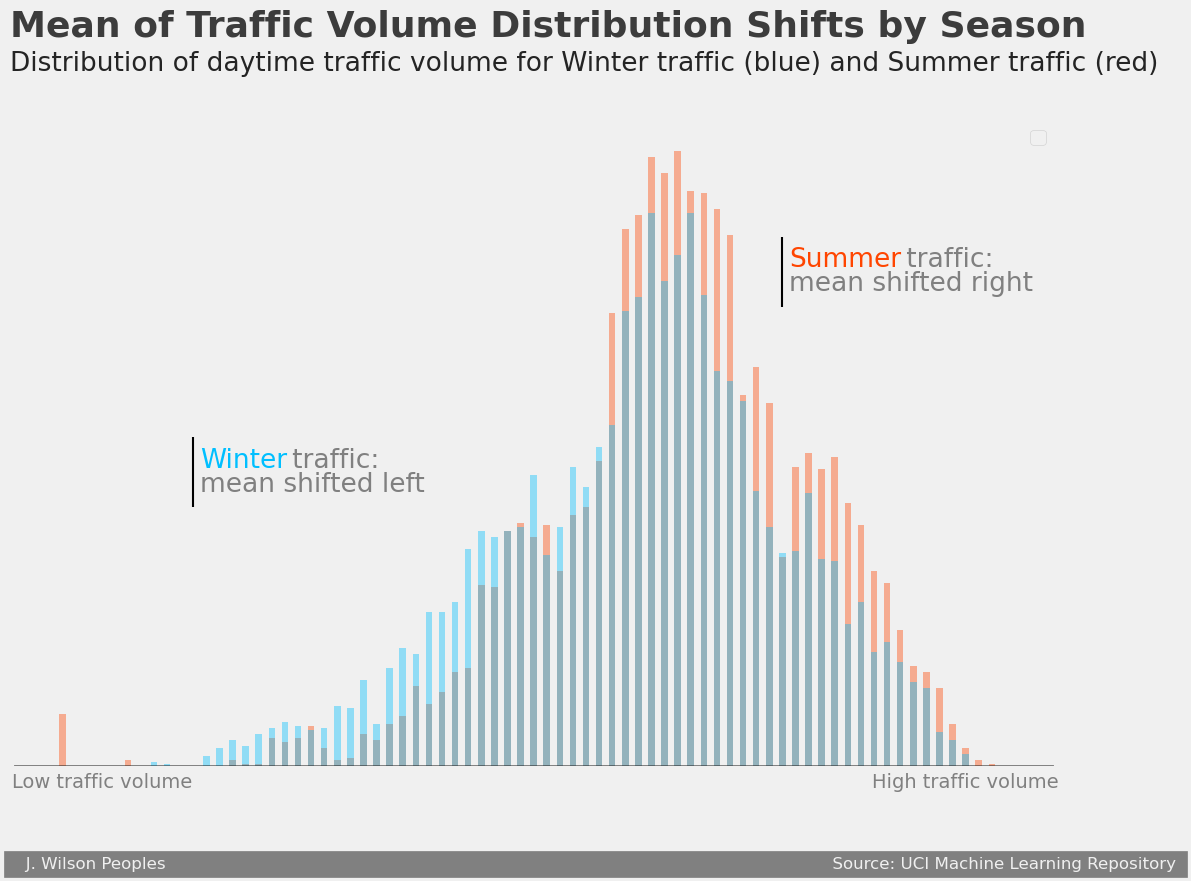

In [23]:
day['season'] = day['month'].apply(lambda x: 'winter' if x in [12,1,2] else 'spring' if x in [3,4,5] else 'summer' if x in [6,7,8] else 'fall')
seasons = day['season'].value_counts().index
#_________________________________________________________
#main plot
fig, ax = plt.subplots(figsize = (12,8))
colors = ['orangered', 'deepskyblue']
for i,season in enumerate(['summer','winter']):
    mask = (day['season'] == season)
    plot_data = day[mask]['traffic_volume'].apply(lambda x: np.round(x,-2)).value_counts()
    ax.bar(plot_data.index,plot_data.values, width = 50, alpha = .4, color = colors[i])
#____________________________________________________________
#Format grid, ticks, etc
ax.grid(visible = False)
ax.set_yticks([])
ax.set_xticks([300,6900])
ax.set_xticklabels(['Low traffic volume','High traffic volume'])
ax.axhline(y = 0, color = 'black', linewidth = 5, alpha = .5)
ax.legend()
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-400,365, 'Mean of Traffic Volume Distribution Shifts by Season', weight = 'bold', size = 26, alpha = .75)
ax.text(-400,348, 'Distribution of daytime traffic volume for Winter traffic (blue) and Summer traffic (red)', size = 19, alpha = .85)
ax.text(x = -400, y = -50,
    s = '   J. Wilson Peoples                                                                                                                               Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________
#_____________________________________________________________
#on figure annotations
ax.text(x = 1050, y = 150, s ='           traffic:', color = 'grey', size = 19)
ax.text(x = 1050, y = 150, s ='Winter', size = 19, color = 'deepskyblue')
ax.text(x = 1050, y = 138, s ='mean shifted left', color = 'grey', size = 19)
ax.vlines(x = 1000, ymin = 130,ymax =165, color = 'black', linewidth = 1.5)

ax.text(x = 5550, y = 250, s ='              traffic:', color = 'grey', size = 19)
ax.text(x = 5550, y = 250, s ='Summer', size = 19, color = 'orangered')
ax.text(x = 5550, y = 238, s ='mean shifted right', color = 'grey', size = 19)
ax.vlines(x = 5500, ymin = 230,ymax =265, color = 'black', linewidth = 1.5)
    

We see here that the distribution itself for each both winter and summer looks similar. The primary difference is that the mean is slightly shifted towards lower traffic volume for winter months, while the mean of the distribution for summer months is slightly shifted towards higher traffic volumes. 

We've widened our scope to see how traffic differs by month. We've also looked closely to see how traffic differs by time of day. However, we haven't looked at how day of the week influences traffic. Let's take a closer look at this. 

# Traffic Indicators by day of week

Let's create a lineplot showing the mean traffic volume for each day of the week. 

/tmp/ipykernel_729/2860564296.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weekday = day.groupby('week_day').mean()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(4.5, 3800, 'Weekend')

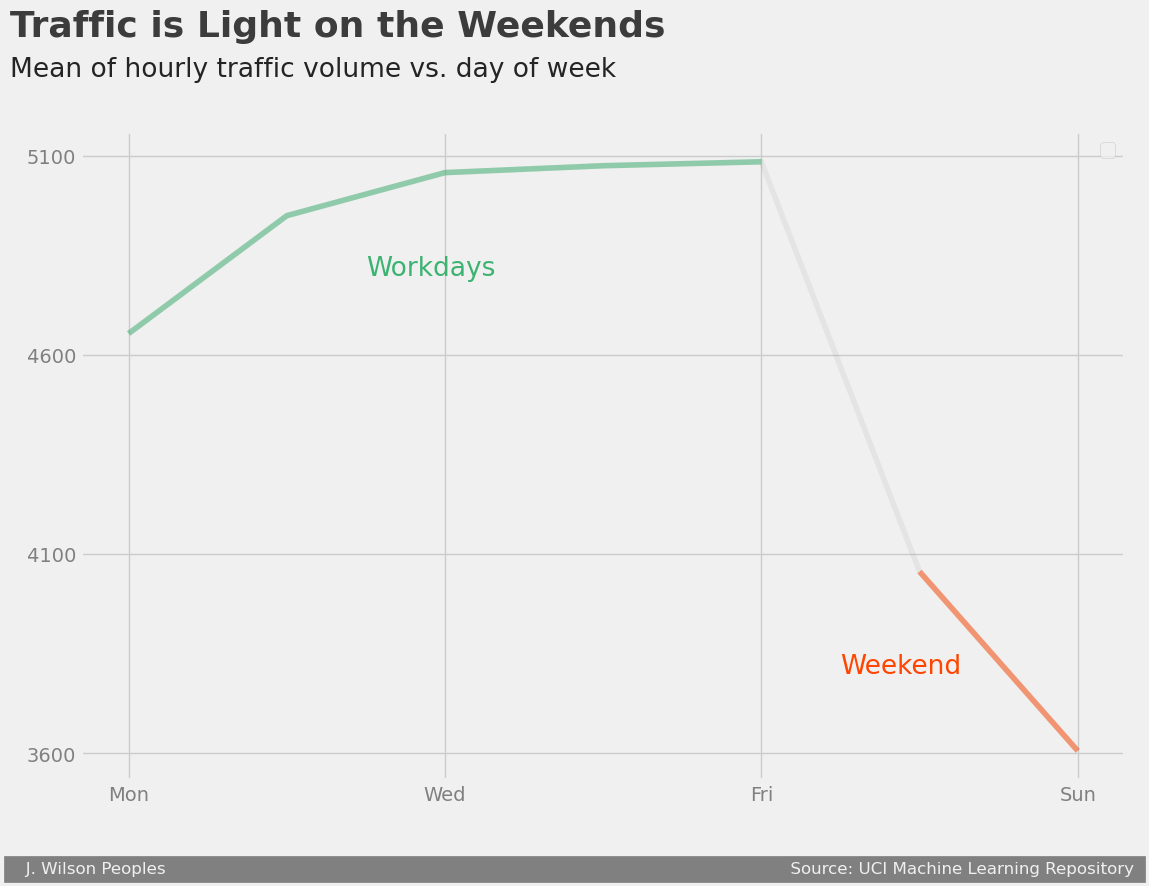

In [9]:
day['week_day'] = day['date_time'].dt.dayofweek
by_weekday = day.groupby('week_day').mean()
#____________________________________________________________
#main plot
fig,ax = plt.subplots(figsize = (12,8))
x_axis = by_weekday.index.to_list()
y_axis = by_weekday['traffic_volume'].to_list()
ax.plot(x_axis, y_axis, alpha = .1, color = 'grey')
ax.plot(x_axis[0:5], y_axis[0:5], alpha = .5, color = 'mediumseagreen')
ax.plot(x_axis[5:], y_axis[5:], alpha = .5, color = 'orangered')
#____________________________________________________________
#Format grid, ticks, etc
ax.legend()
ax.tick_params(colors = 'grey', which = 'both')
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['Mon','Wed','Fri','Sun'])
ax.set_yticks([3600,4100,4600,5100])
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-.75,5400, 'Traffic is Light on the Weekends', weight = 'bold', size = 26, alpha = .75)
ax.text(-.75,5300, 'Mean of hourly traffic volume vs. day of week', size = 19, alpha = .85)
ax.text(x = -.75, y = 3300,
    s = '   J. Wilson Peoples                                                                                                                       Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________
#_____________________________________________________________
#on figure annotations
ax.text(x = 1.5, y = 4800, s ='Workdays', size = 19, color = 'mediumseagreen')
ax.text(x = 4.5, y = 3800, s ='Weekend', size = 19, color = 'orangered')

The above plot shows that traffic is much heavier on working days (Mon - Fri), and drops off quickly during the weekends. This could be due to higher volumes of traffic during rush hour. To investigate this hypothesis, let's compare plots of mean traffic volume vs. hour for weekends, as well as week 
days.

To begin, let's create a new hour column, similar to before. Then, we can separate out two dataframes: workdays and weekdays. After that, we can group by hour in each dataframe to answer our question. 

In [10]:
day['hour'] = day['date_time'].dt.hour
workdays = day.copy()[day['week_day'] <= 4]
weekend = day.copy()[day['week_day'] > 4]
by_hour_workday = workdays.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

/tmp/ipykernel_729/3815138057.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_workday = workdays.groupby('hour').mean()
/tmp/ipykernel_729/3815138057.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


Now, let's plot the traffic volume column against the hour, for each dataframe. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(16.1, 4680, 'Hour')

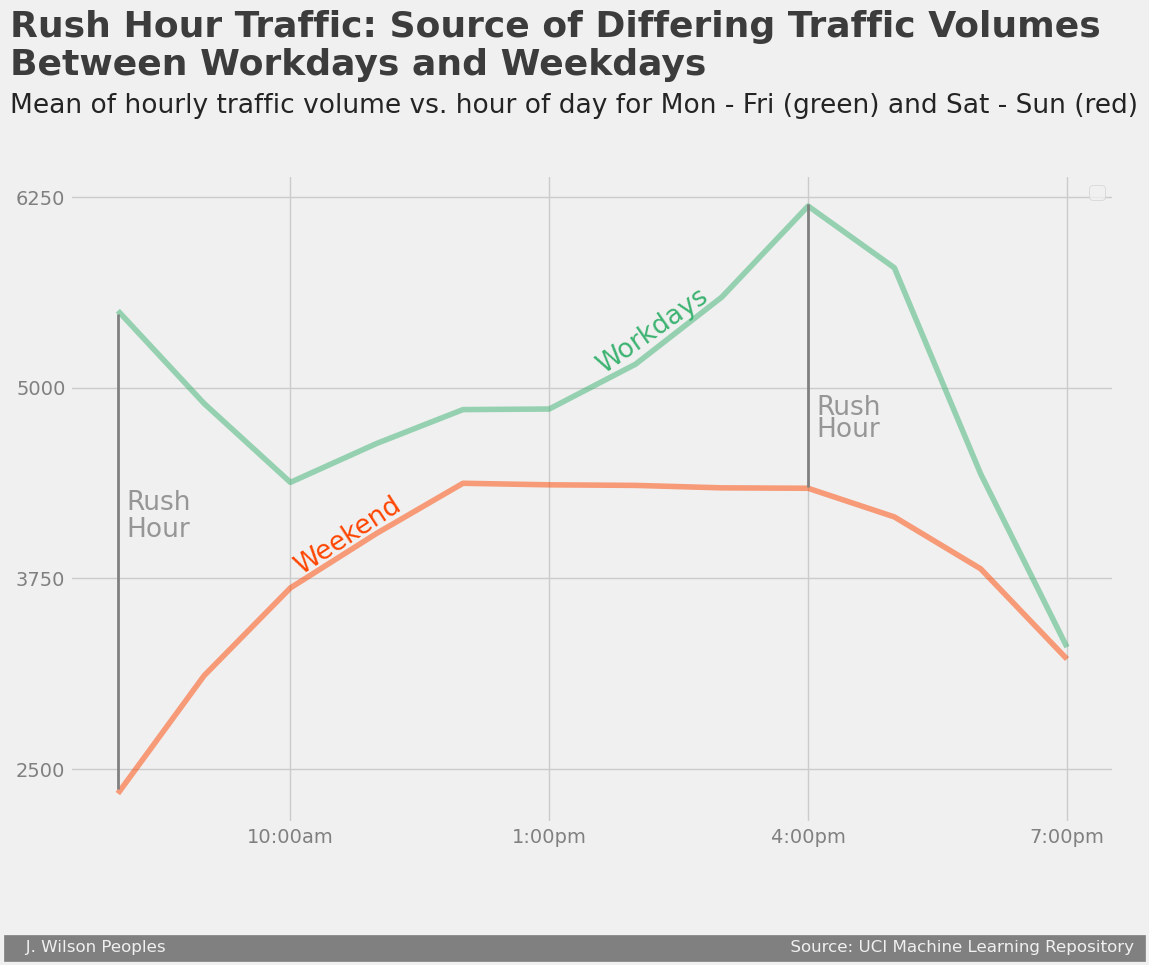

In [11]:
#______________________________________
#main plot
fig,ax = plt.subplots(figsize = (12,8))
x_axis = by_hour_workday.index.to_list()
y_axis_1 = by_hour_workday['traffic_volume'].to_list()
y_axis_2 = by_hour_weekend['traffic_volume'].to_list()
ax.plot(x_axis, y_axis_1, alpha = .5, color = 'mediumseagreen')
ax.plot(x_axis, y_axis_2, alpha = .5, color = 'orangered')
#____________________________________________________________
#Format grid, ticks, etc
ax.set_xticks([10,13,16,19])
ax.set_xticklabels(['10:00am','1:00pm', '4:00pm','7:00pm'])
ax.set_yticks([2500,3750,5000,6250])
ax.legend()
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(6.75,7300, 'Rush Hour Traffic: Source of Differing Traffic Volumes', weight = 'bold', size = 26, alpha = .75)
ax.text(6.75,7050, 'Between Workdays and Weekdays', weight = 'bold', size = 26, alpha = .75)
ax.text(6.75,6800, 'Mean of hourly traffic volume vs. hour of day for Mon - Fri (green) and Sat - Sun (red)', size = 19, alpha = .85)
ax.text(x = 6.75, y = 1300,
    s = '   J. Wilson Peoples                                                                                                                       Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________
#_____________________________________________________________
ax.vlines(x = 8,ymin =2370, ymax = 5480, color = 'grey', linewidth = 2)
ax.vlines(x = 16,ymin =4350, ymax = 6200, color = 'grey', linewidth = 2)
ax.text(x = 13.5, y = 5100, s ='Workdays', size = 19, color = 'mediumseagreen', rotation = 35)
ax.text(x = 10, y = 3780, s ='Weekend', size = 19, color = 'orangered', rotation = 33)
ax.text(x = 8.1, y = 4200, s ='Rush', size = 19, color = 'grey', alpha = .8)
ax.text(x = 8.1, y = 4020, s ='Hour', size = 19, color = 'grey', alpha = .8)
ax.text(x = 16.1, y = 4820, s ='Rush', size = 19, color = 'grey', alpha = .8)
ax.text(x = 16.1, y = 4680, s ='Hour', size = 19, color = 'grey', alpha = .8)


We can see that the large difference from before is due primarily to differences during rush hour (8:00am, as well as 4:00pm). Apart from these hours, the difference in volume is relatively small, though there is a smaller, baseline difference between the two which persists until 7:00pm. 

While we've investigated thoroughly how traffic volume is related to time, we have not yet investigated how weather impacts traffic volume. We'll take a closer look at this in the next section. 

# The Impact of Weather on Traffic

To begin, let's single out all the columns weather, and create a new dataframe consisting only of these columns (and traffic volume).

In [12]:
weather_and_traffic = day[['traffic_volume', 'temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description']]
weather_and_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23759 entries, 0 to 48199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       23759 non-null  int64  
 1   temp                 23759 non-null  float64
 2   rain_1h              23759 non-null  float64
 3   snow_1h              23759 non-null  float64
 4   clouds_all           23759 non-null  int64  
 5   weather_main         23759 non-null  object 
 6   weather_description  23759 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


While some columns are categorical, others are numerical. Let's first extract the numeric columns, and see how correlated the numeric columns are with the traffic volume column.

In [13]:
weather_numeric = weather_and_traffic[['traffic_volume', 'temp','rain_1h','snow_1h','clouds_all']]
weather_numeric.corr()['traffic_volume']

traffic_volume    1.000000
temp              0.133283
rain_1h           0.005001
snow_1h           0.005186
clouds_all       -0.037828
Name: traffic_volume, dtype: float64

It seems that none of these columns are highly correlated with traffic volume. The highest correlation is between traffic volume and temperature. To get a closer look at these two columns, let's create a scatterplot. 

/tmp/ipykernel_729/1535728484.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','     Low Volume','','','','','','','      High Volume'])


Text(-800, 180, '   J. Wilson Peoples                                                                                                                       Source: UCI Machine Learning Repository ')

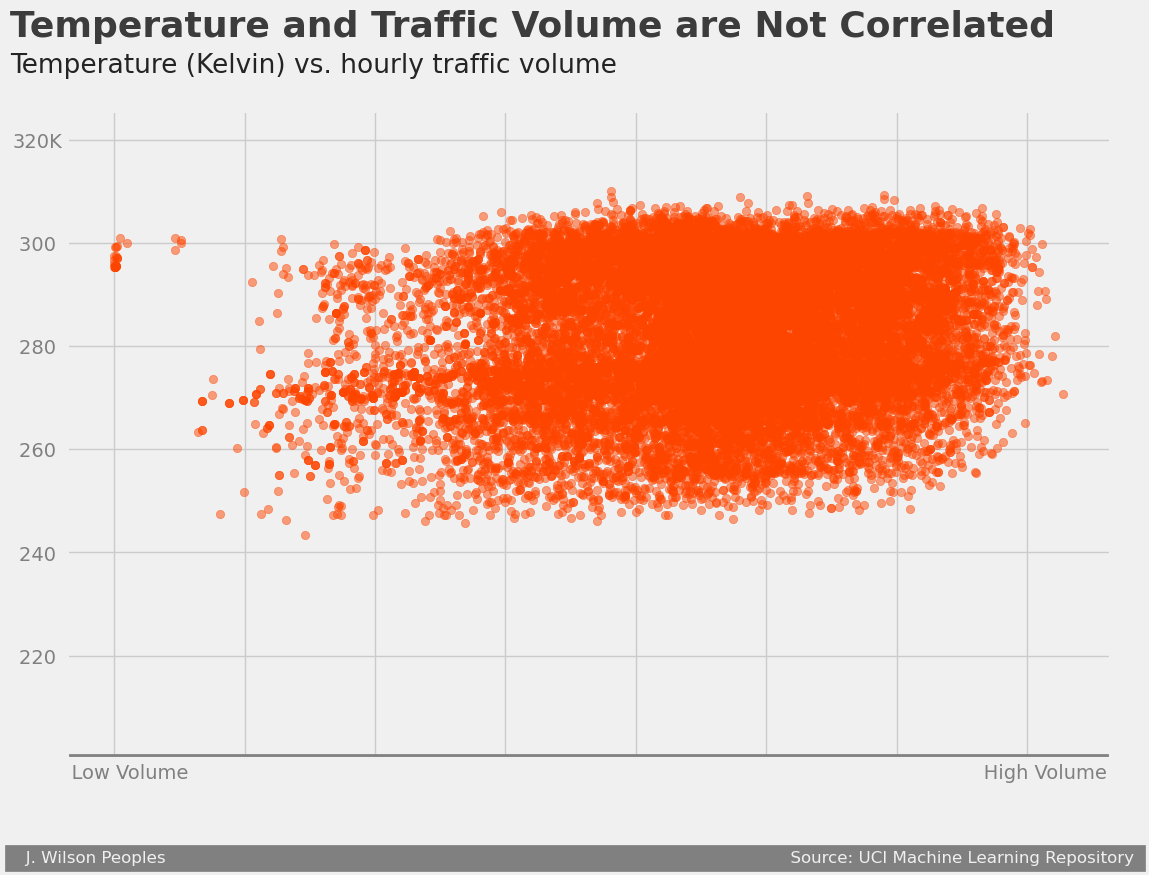

In [14]:
#______________________________________
#main plot
fig,ax = plt.subplots(figsize = (12,8))
x_axis = weather_numeric['traffic_volume']
y_axis = weather_numeric['temp']
ax.scatter(x_axis, y_axis, alpha = .5, color = 'orangered')
#____________________________________________________________
#Format grid, ticks, etc
ax.set_ylim(bottom = 200)
ax.set_xticklabels(['','     Low Volume','','','','','','','      High Volume'])
ax.set_yticks([220,240,260,280,300,320])
ax.set_yticklabels(['220 ', '240 ', '260 ', '280 ', '300 ', '320K'])
ax.tick_params(colors = 'grey', which = 'both')
ax.axhline(y = 200, color = 'grey', linewidth = 7)
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-800,340, 'Temperature and Traffic Volume are Not Correlated', weight = 'bold', size = 26, alpha = .75)
ax.text(-800,333, 'Temperature (Kelvin) vs. hourly traffic volume', size = 19, alpha = .85)
ax.text(x = -800, y = 180,
    s = '   J. Wilson Peoples                                                                                                                       Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________
#_____________________________________________________________

We see from the above plot that temperature and traffic volume are not correlated. While some of particularly low traffic volume happened to occur during high temperatures, we see that many instances of high volume traffic occur at similar temperatures. 

Overall, there doesn't seem to be a strong link between traffic patterns and weather. While this is quite surprising, one possible explanation is that bad weather results in fewer drivers overall, as people try to avoid the roads. 

So far, we've only analyzed the numeric columns. Let's take a look at some of the categorical columns and how they relate to traffic volume. 

In [16]:
weather = day[['traffic_volume','weather_main','weather_description']]
weather.head()

,traffic_volume,weather_main,weather_description
0,5545,Clouds,scattered clouds
1,4516,Clouds,broken clouds
2,4767,Clouds,overcast clouds
3,5026,Clouds,overcast clouds
4,4918,Clouds,broken clouds


We see that the weather_main gives a basic description, while weather_description is slightly more detailed. To begin, let's visualize the weather_main column. 

In [19]:
by_weather_main = weather.groupby('weather_main').mean(numeric_only = True)
by_weather_description = weather.groupby('weather_description').mean(numeric_only = True)

The following plot sizes each word according to how large the mean traffic volume is for a given value of weather_main.

(-0.5, 399.5, 199.5, -0.5)

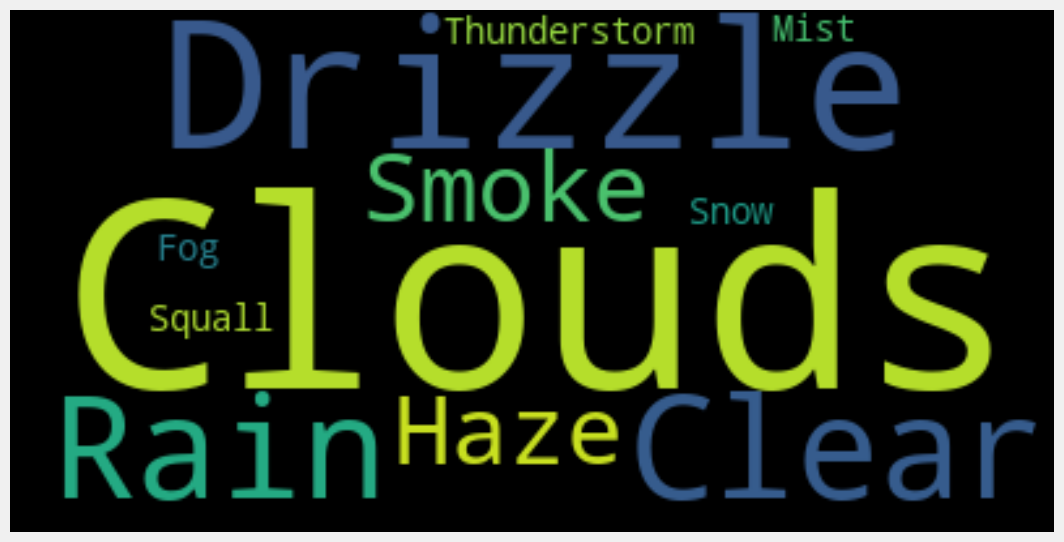

In [22]:
from wordcloud import WordCloud
# create word frequency dictionary
word_freq = by_weather_main['traffic_volume'].to_dict()
text = " ".join([(k + " ")*int(v) for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False).generate(text)
fig,ax = plt.subplots(figsize = (12,8))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis('off')

We see that Clouds, Rain, Drizzle, and Clear all have similar means. Snow, Fog,Squall, Mist, and Thunderstorm, however, all have smaller means. The latter group are conditions that would deter drivings from being on the road, so the difference in traffic volume makes sense. 

If this explanation is valid, then we would expect conditions, such as light rain or light snow, to correspond to a similar or higher traffic volume than their heavy rain/snow counterparts. We can test this hypothesis using the more detailed weather description column. 

Text(-1100, -1.5, '   J. Wilson Peoples                                                                                                                                            Source: UCI Machine Learning Repository ')

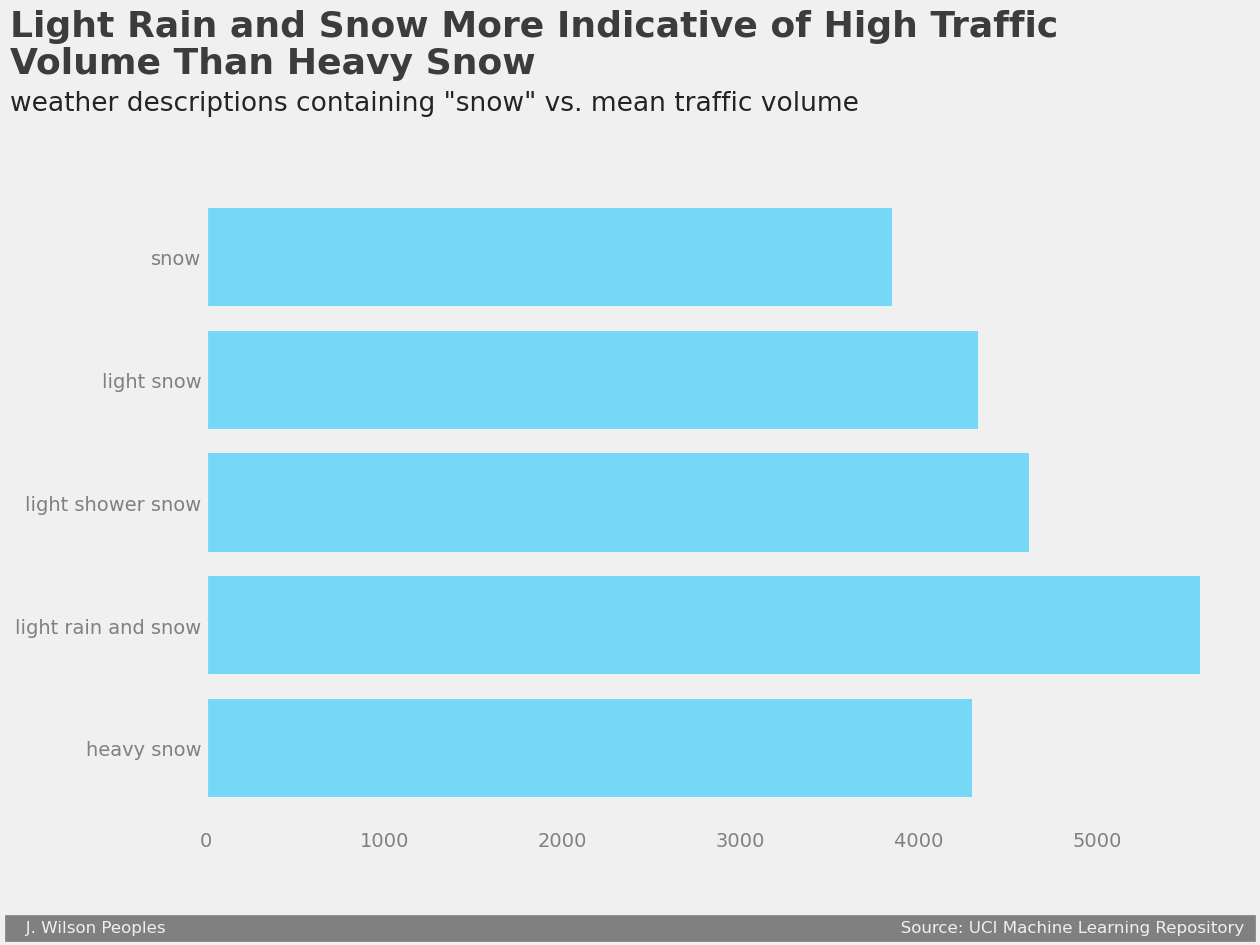

In [69]:
plot_data = by_weather_description[by_weather_description.index.to_series().str.contains('snow')] #filter out means of descriptions containing snow
x_axis = plot_data.index.to_list()
y_axis = plot_data['traffic_volume'].to_list()
#____________________________________________________________
#main plot
fig,ax = plt.subplots(figsize = (12,8))
ax.barh(x_axis, y_axis, alpha = .5, color = 'deepskyblue')
#____________________________________________________________
#Format grid, ticks, etc
ax.grid(visible = False)
ax.tick_params(colors = 'grey', which = 'both')
#___________________________________________________________
#create title,subtitle,signature bar
ax.text(-1100,5.8, 'Light Rain and Snow More Indicative of High Traffic', weight = 'bold', size = 26, alpha = .75)
ax.text(-1100,5.5, 'Volume Than Heavy Snow', weight = 'bold', size = 26, alpha = .75)
ax.text(-1100,5.2, 'weather descriptions containing "snow" vs. mean traffic volume', size = 19, alpha = .85)
ax.text(x = -1100, y = -1.5,
    s = '   J. Wilson Peoples                                                                                                                                            Source: UCI Machine Learning Repository ',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')
#___________________________________________________________

We've found that, overall, more intense conditions like heavy snow actually correspond to lower traffic volumes. Lighter conditions that may come on quickly, however, such as light rain and light snow, do result in heavier traffic. 

# Conlusion 

In this notebook, we investigated highway traffic volume data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) to determine differect factors that contribute to high traffic volume. 

Overall, we investigated the impact of time and weather on traffic. For time, we found that:
- Traffic at night is significantly less heavy than traffic during the day.
- Peak traffic hours between Monday and Friday occur at rush hour (8:00am and 4:00pm). 
- On the weekends, traffic at 8:00am and 4:00pm, as well as overall, is significantly less than on weekdays. 
- Traffic is much lighter in the months of December and July, likely a result of lessened school traffic. 

For weather, we found that:
- Weather is a less reliable predictor of traffic.
- Conditions of light rain and snow is the strongest weather indicator of heavy traffic. 